In [ ]:
include("..\\src\\ImportanceSampling.jl")
using Distributions
using ImportanceSampling
using Seaborn

In [2]:
srand(2^10);

## poisson

In [3]:
function gen_w_poisson(λ0::Real, λ::Real)
    C = exp(λ-λ0)
    r= λ0/λ
    return (x::AbstractVector{<:Real}) -> C*r^first(x)
end

f!(r, x) = r .= x

nmeans = 16
λ0s = linspace(0.25, 4, nmeans)
q = Poisson()
ws = [gen_w_poisson(λ0, 1) for λ0 in λ0s]

ntrials = 20
niters = 10_000
;

In [4]:
iss = Matrix(ntrials, nmeans)

for i in 1:nmeans
    for tr in 1:ntrials
        iss[tr, i] = ImportanceSampler(f!, 1, q, w=ws[i])
        update!(iss[tr, i]; niters=niters, batchsize=1000)
    end
end

In [5]:
ms = first.(mean.(iss))
vs = first.(var.(iss))
nes = ne.(iss)
neσs = neσ.(iss)

est_v = vec(var(ms, 1))
ms_avg = vec(mean(ms, 1))
vs_avg = vec(mean(vs, 1))
nes_avg = vec(mean(nes, 1))
neσs_avg = vec(mean(neσs, 1))
;

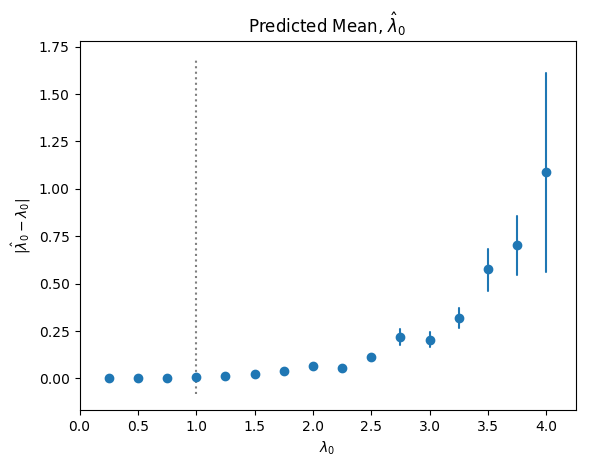

C:\Anaconda3\envs\conda_jl\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [6]:
tsplot(abs.(ms.-λ0s'), λ0s, err_style="ci_bars", interpolate=false)
vlines(1, ylim()..., color="grey", linestyle="dotted")
title("Predicted Mean, " * L"\hat \lambda_0")
xlabel(L"\lambda_0")
ylabel(L"|\hat \lambda_0 - \lambda_0 |")
savefig("../img/poisson_mean.png", bbox_inches="tight")
;

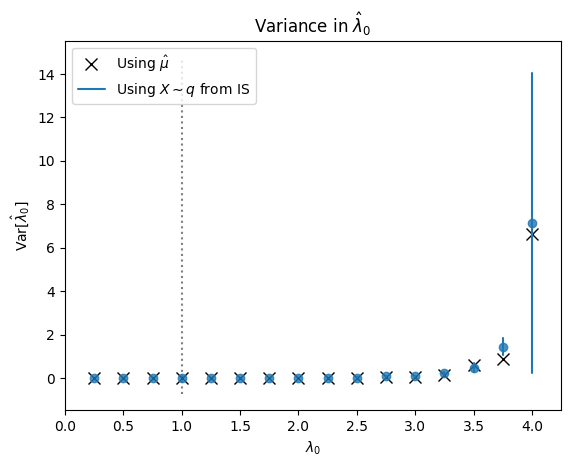

In [7]:
plot(λ0s, est_v, "kx", ms="9")
tsplot(vs, λ0s, err_style="ci_bars", interpolate=false, alpha=0.8)
vlines(1, ylim()..., color="grey", linestyle="dotted")
title("Variance in " * L"\hat \lambda_0")
xlabel(L"\lambda_0")
ylabel(L"\mathrm{Var}[\hat \lambda_0]")
legend(["Using " * L"\hat \mu", "Using " * L"X \sim q" * " from IS"])
savefig("../img/poisson_var.png", bbox_inches="tight")
;

In [8]:
λ = 1
λ0s_pred = linspace(first(λ0s), last(λ0s), 100)
nes_pred = niters ./ [exp((λ0-λ)^2*λ) for λ0 in λ0s_pred]
;

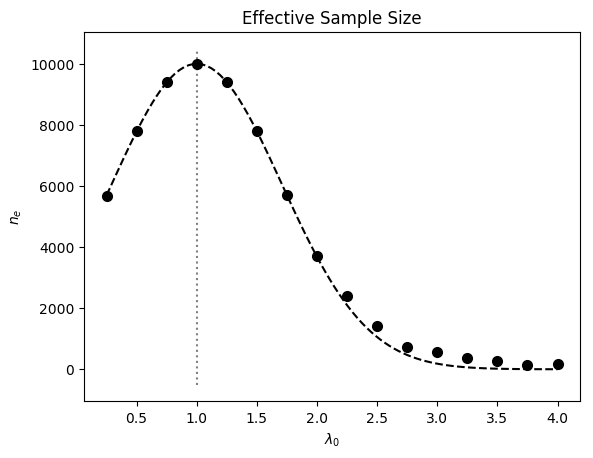

In [9]:
plot(λ0s_pred, nes_pred, "--k") 
plot(λ0s, nes_avg, "ko", ms=7)
vlines(1, ylim()..., color="grey", linestyle="dotted")
title("Effective Sample Size")
xlabel(L"\lambda_0")
ylabel(L"n_e")
savefig("../img/poisson_ne.png", bbox_inches="tight")
;

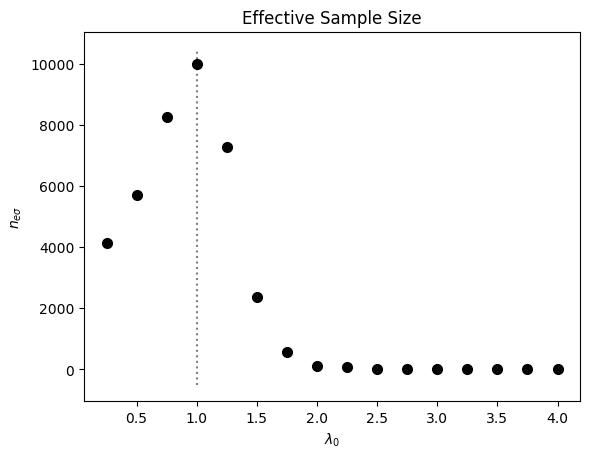

In [10]:
plot(λ0s, neσs_avg, "ko", ms=7)
vlines(1, ylim()..., color="grey", linestyle="dotted")
title("Effective Sample Size")
xlabel(L"\lambda_0")
ylabel(L"n_{e\sigma}")
savefig("../img/poisson_nesigma.png", bbox_inches="tight")
;